The Netflix Titles dataset provides us with information about shows on the Netflix streaming platform. The premise of this data analysis put simply is to create a profile of properties for content on Netflix. From this we can make potential suggestions for future content based on what is currently typical on the platform. We'll do this by examining what the main attributes are: Where in the world is Netflix's content produced? Are film or tv shows more popular? Which directors and actors/actresses appear in the most content? What are the most frequent tags/genres? All of this will be visualised to allow for ease of interpretation and digestibility, with a final profile established in the conclusion. Main skills covered: Data Exploring, Data Preparation, Data-frame Manipulation, Conditionals and Data Visualisation.

In [2]:
#First, we need to be able to alter the dataframe
import pandas as pd

#This will help us with data visualisation once sufficiently manipulated
import seaborn as sns
sns.set(palette='deep')

#For additional visualisation
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

#For numberical operations
import numpy as np

In [3]:
#Import the data
df = pd.read_csv(r'C:\Users\AJ\Desktop\Data\Hackathon\netflix_titles.csv')

We're now going to perform the basic operations to gain some sense of what our data-frame properties are.
This will include: 
What it looks like, 
the column names and data types, shape of frame, 
and how many missing values we have.

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Although the .info shows the non-null values, this gives exact null values in data 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

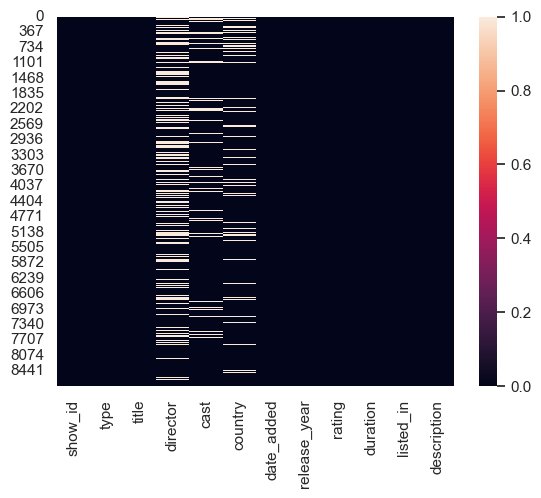

In [8]:
#This is a seaborn plot that allows us to visually see what areas are missing data and where that data is missing by column
sns.heatmap(df.isnull())

In [9]:
#An applied mask for duplicated entries
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


No exact duplicates in the dataset. To staring building a profile of an ideal show or film we need to establish the following things: Most popular country, most popular actors and directors (this would also be split into TV and Movies), and most frequent tags/genres. Let's start with country.

In [10]:
#This can be achieved very quickly via a data-frame mask
countries_list = df['country'].value_counts()
countries_list

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

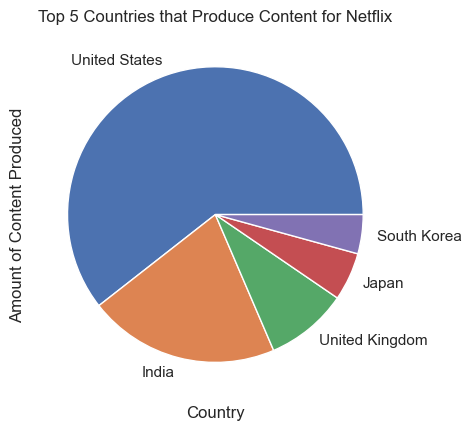

In [11]:
#We can plot this, and a good visual representation for this data would be a pie chart of the top 5 countries
countries_list.head(5).plot(kind = 'pie')
plt.title('Top 5 Countries that Produce Content for Netflix')
plt.xlabel('Country')
plt.ylabel('Amount of Content Produced')
plt.show();

We could see previously from the value counts that the United States was a clear favourite, however it puts into perspective just how dominant it is when you can visually see that it has more entries that the next 4 highest nations combined. We can also use this method to discern whether our profile should focus on TV or Film.

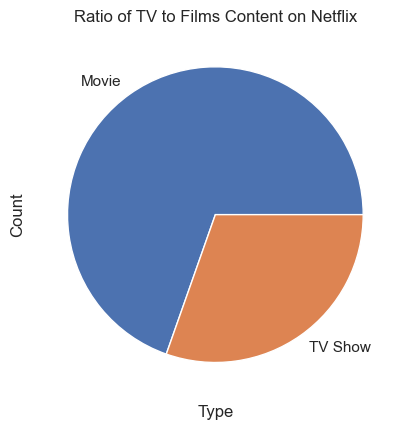

In [12]:
TV_or_Film = df['type'].value_counts()
TV_or_Film.plot(kind = 'pie')
plt.title('Ratio of TV to Films Content on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show();

The content is predominantly Movies, so we’ll use this information going forward when we do further analysis. The final very quick piece of analysis we can perform for our profile is to determine which rating is most common in American films, so we'll do this before performing some more in depth data-frame manipulation.

In [13]:
#This can be done so quickly because each title can only have 1 rating

#Best practise to copy the dataframe and label it as directors as I don't want any permanent / irreversible changes to the original dataframe
US_film_directors = df.copy()

#Using a conditional, we can create a mask for the dataframe that is solely comprised of films from the United States
US_film_directors_mask = (US_film_directors['type'] == 'Movie') & (US_film_directors['country'] == 'United States')
#We can then apply this to the dataframe
US_film_directors = US_film_directors[US_film_directors_mask]
#And finally check this new dataframe to see if our conditional applied correctly
US_film_directors

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...
...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [14]:
US_film_directors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 8805
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2058 non-null   object
 1   type          2058 non-null   object
 2   title         2058 non-null   object
 3   director      2000 non-null   object
 4   cast          1864 non-null   object
 5   country       2058 non-null   object
 6   date_added    2058 non-null   object
 7   release_year  2058 non-null   int64 
 8   rating        2058 non-null   object
 9   duration      2055 non-null   object
 10  listed_in     2058 non-null   object
 11  description   2058 non-null   object
dtypes: int64(1), object(11)
memory usage: 209.0+ KB


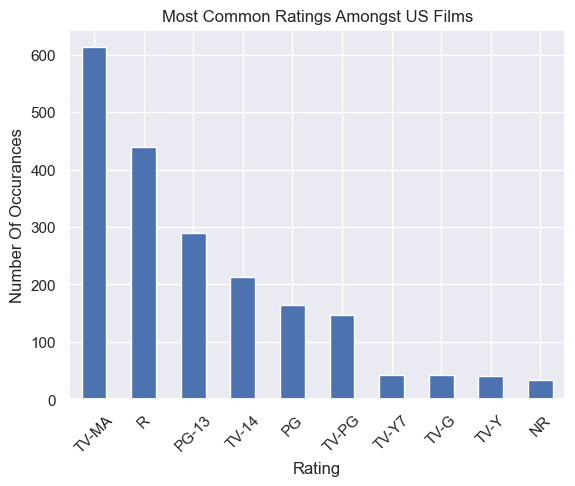

In [15]:
US_film_directors['rating'].value_counts().head(10).plot(kind='bar')
plt.title('Most Common Ratings Amongst US Films')
plt.ylabel('Number Of Occurances')
plt.xlabel('Rating')
plt.xticks(rotation = 45)
plt.show();

We can see that our most common ratings are TV-MA and R, both of which are for mature audiences where content might be inappropriate for viewers under the age of 17. For the next part of our profile we need to expand the directors list as some entries have multiple directors and/or co-directors, we can get a true figure for director counts that includes the co-directors if we expand the string when there is a comma present and then perform a value count of all directors.

In [16]:
#First, we'll make a data frame just containing the show ID and the Director columns so that we can continue to manipulate it as a dataframe
just_US_film_directors = US_film_directors[['show_id', 'director']]

#As we saw earlier during our initial data inspection, there are a lot of NaN values in the director column, we can remove these before continuing
just_US_film_directors.dropna(axis=0, inplace=True)

#Now we'll split the string, and create a new column per directors
US_film_directors_expanded = just_US_film_directors['director'].str.split(pat=', ', expand=True)

#Then we'll melt the columns of directors to create a single column that we can use a simple value count to find our top 10 directors
US_film_directors_melt = US_film_directors_expanded.melt(var_name='Temp Index', value_name='Director')
US_film_directors_melt['Director'].value_counts().head(10)

C:\Users\AJ\AppData\Local\Temp\ipykernel_12480\2930808009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_US_film_directors.dropna(axis=0, inplace=True)


Director
Jay Karas          15
Marcus Raboy       14
Jay Chapman        12
Shannon Hartman     9
Martin Scorsese     8
Troy Miller         8
Lance Bangs         7
Leslie Small        7
Ryan Polito         7
William Lau         6
Name: count, dtype: int64

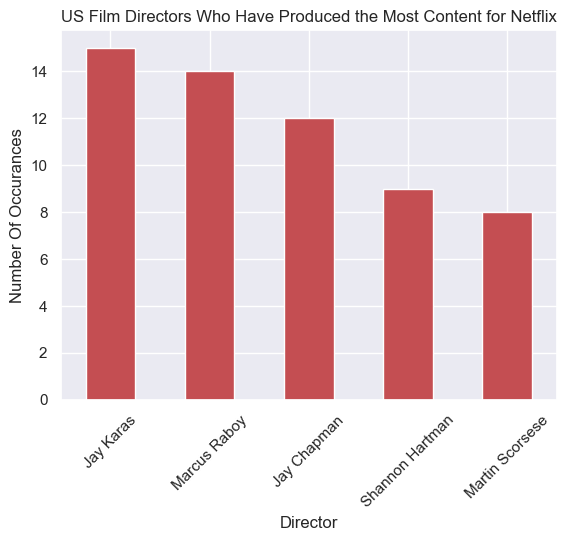

In [17]:
#We'll now visualise this and do some research on our directors
US_film_directors_melt['Director'].value_counts().head(5).plot(kind='bar', color='r')
plt.title('US Film Directors Who Have Produced the Most Content for Netflix')
plt.ylabel('Number Of Occurances')
plt.xticks(rotation = 45)
plt.show();

And here we have our most commonly recurring directors, Jay Karas is top with 15 movies, but digging slightly deeper and performing some research it shows that Jay Karas predominently directs Netflix's many stand-up specials, as do the entire top 4 of directors including Marcus Raboy, Jay Chapman and Shannon Hartman. Our first director of feature films is Martin Scorsese with 8 credits.

C:\Users\AJ\AppData\Local\Temp\ipykernel_12480\1800397597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_US_film_actors.dropna(axis=0, inplace=True)


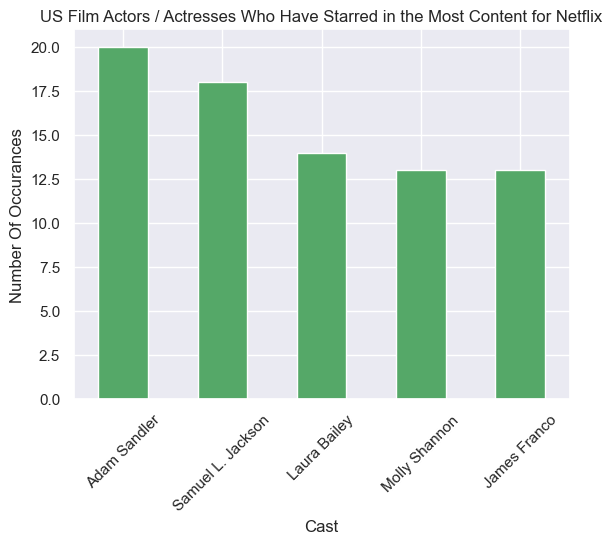

In [18]:
#We can then use this method again to find our top film actors
US_film_actors = df.copy()
US_film_actors_mask = (US_film_actors['type'] == 'Movie') & (US_film_actors['country'] == 'United States')
US_film_actors = US_film_actors[US_film_actors_mask]
just_US_film_actors = US_film_actors[['show_id', 'cast']]
just_US_film_actors.dropna(axis=0, inplace=True)
US_film_actors_expanded = just_US_film_actors['cast'].str.split(pat=', ', expand=True)
US_film_actors_melt = US_film_actors_expanded.melt(var_name='Temp Index', value_name='Cast')
US_film_actors_melt['Cast'].value_counts().head(10)
US_film_actors_melt['Cast'].value_counts().head(5).plot(kind='bar', color='g')
plt.title('US Film Actors / Actresses Who Have Starred in the Most Content for Netflix')
plt.ylabel('Number Of Occurances')
plt.xticks(rotation = 45)
plt.show();

Adam Sandler and Samuel L. Jackson are our most popular actors at number 1 and 2 with 20 and 18 films respectively. Voice actress Laura Bailey is third with 14 credits, followed by Molly Shannon and James Franco with 13 credits each.

For genre it's slightly easier to find our top tags as during inspection we saw a maximum of 3 tags per title, so we can expand a dataframe of american films with 3 columns called Genre 1, Genre 2, Genre 3

In [19]:
#Start with a copy of the dataframe
genre_df = df.copy()

#Create a condition with our known profile parameters, American film
american_film_mask = (genre_df['type'] == 'Movie') & (genre_df['country'] == 'United States')

genre_df = genre_df[american_film_mask]

#Genre expansion via creation of new columns
genre_df[['genre1', 'genre2', 'genre3']] = df['listed_in'].str.split(', ', expand=True)

genre_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre1,genre2,genre3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,None,None
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Comedies,Dramas,None
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,Comedies,None,None
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,Horror Movies,Sci-Fi & Fantasy,None
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,Action & Adventure,Classic Movies,Dramas


In [20]:
#Our quick look at the data can see that a large amount of values are filled with 'None', let's replace these with NaN values
genre_df.replace(to_replace=[None], value=np.nan, inplace=True)

#Quick look at the data-frame to check
genre_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre1,genre2,genre3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,NaN,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Comedies,Dramas,NaN
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,Comedies,NaN,NaN
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,Horror Movies,Sci-Fi & Fantasy,NaN
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,Action & Adventure,Classic Movies,Dramas


In [21]:
#Again, we can melt this dataframe to give us an easier value count and discern which tags occur most frequently.
genre_melted = genre_df.melt(id_vars=['show_id'], value_vars=['genre1', 'genre2', 'genre3'], var_name='which_genre_tag', value_name='Genre')

#Looking at the dataframe to see if the melt has gone correctly
genre_melted

,show_id,which_genre_tag,Genre
0,s1,genre1,Documentaries
1,s10,genre1,Comedies
2,s28,genre1,Comedies
3,s29,genre1,Horror Movies
4,s42,genre1,Action & Adventure
...,...,...,...
6169,s8792,genre3,Independent Movies
6170,s8794,genre3,NaN
6171,s8803,genre3,Thrillers
6172,s8805,genre3,NaN


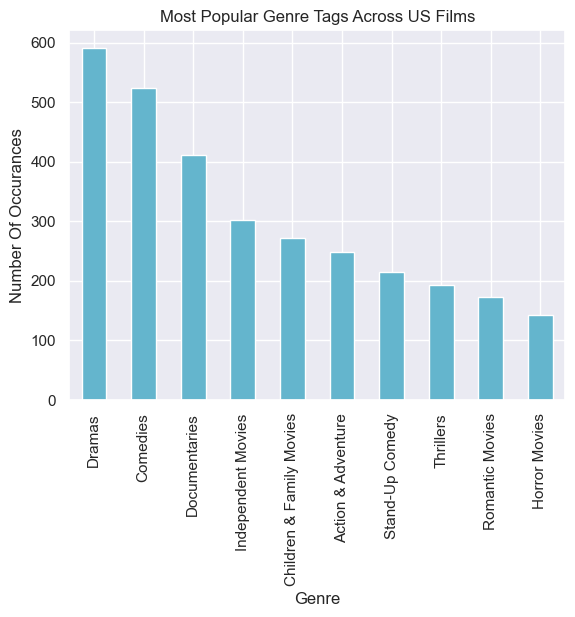

In [23]:
#We can then visualise and check which of our genres are most popular
genre_melted['Genre'].value_counts().head(10).plot(kind='bar', color='c')
plt.title('Most Popular Genre Tags Across US Films')
plt.ylabel('Number Of Occurances');

And with that we can finalise our profile for content currently being streamed on Netflix: The overwhelming majority of content is US produced dramatic and comedic films, intended for mature audiences over the age of 17. Often starring Adam Sandler or Samuel L. Jackson and directed by Martin Scorese if we exclude directors of stand-up specials.